Import essential libraries

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path1 = '/content/drive/MyDrive/logistic regression dataset/breast_cancer_modified.csv'
df1 = pd.read_csv(dataset_path1)

dataset_path2 = '/content/drive/MyDrive/logistic regression dataset/ionosphere_modified.csv'
df2 = pd.read_csv(dataset_path2)

# Dataset Analysis

In [ ]:
pd.set_option('display.max_columns', None)  # Set to None to display all columns

In [ ]:
def analyzeDataset(df):
    missing_values = df.isnull().sum()
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_values.plot.bar(ax=ax)
    for i, val in enumerate(missing_values):
        ax.text(i, val + 10, str(val), ha='center', fontweight='bold')

    plt.show()

In [ ]:
analyzeDataset(df1)

In [ ]:
analyzeDataset(df2)

In [ ]:
df1.describe()

In [ ]:
df2.describe()

In [ ]:
# Distribution of classes
print(df1['Diagnosis'].value_counts())
print(df2['Label'].value_counts())

B    357
M    212
Name: Diagnosis, dtype: int64
g    225
b    126
Name: Label, dtype: int64


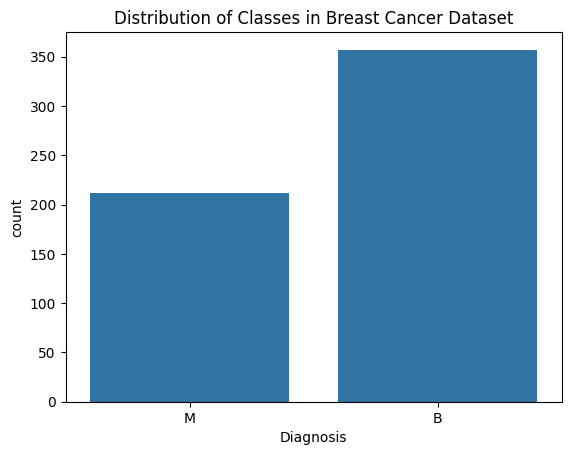

In [ ]:
# Class distribution for Breast Cancer dataset
sns.countplot(x='Diagnosis', data=df1)
plt.title('Distribution of Classes in Breast Cancer Dataset')
plt.show()

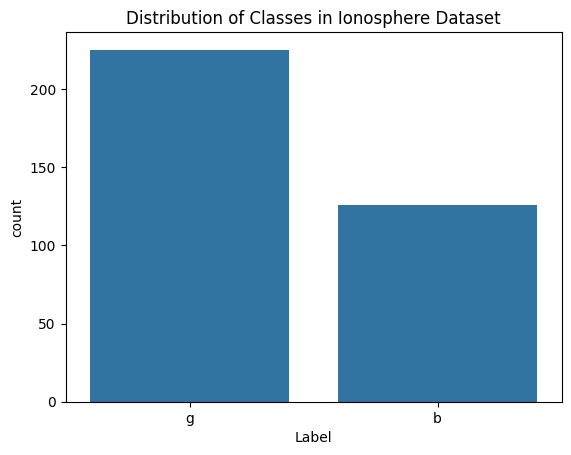

In [ ]:
# Class distribution for Ionosphere dataset
sns.countplot(x='Label', data=df2)
plt.title('Distribution of Classes in Ionosphere Dataset')
plt.show()

In [ ]:
# Feature distributions in Breast Cancer dataset
features_bc = df1.columns[1:]
for feature in features_bc:
    sns.histplot(df1[feature], kde=True)
    plt.title(f'Distribution of {feature} - Breast Cancer')
    plt.show()

In [ ]:
# Feature distributions in Ionosphere dataset
features_io = df2.columns[:]
for feature in features_io:
    sns.histplot(df2[feature], kde=True)
    plt.title(f'Distribution of {feature} - Ionosphere')
    plt.show()

In [ ]:
df1 = df1.drop(columns=['ID'])

In [ ]:
def visualize_correlation_matrix(df, title):
    corr_matrix = df.corr()
    # Mask to hide upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Setting up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generating a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=False)  # Annotations are turned off for clarity
    plt.title(title)
    plt.show()

In [ ]:
visualize_correlation_matrix(df1, 'Full Correlation Matrix for Breast Cancer Dataset')

In [ ]:
visualize_correlation_matrix(df2, 'Full Correlation Matrix for Ionosphere Dataset')

# Preprocessing

Encode categorical variables

In [ ]:
df1['Diagnosis'] = df1['Diagnosis'].map({'B': 1, 'M': 0})
df2['Label'] = df2['Label'].map({'g': 1, 'b': 0})